# 大数据挖掘作业一


## wine数据集探索性分析

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
# 读取数据集并存放在winedata中 显示一下前几个数据先大概观察一下
winedata_file = open("H:\数据挖掘\作业1\wine-reviews\winemag-data-130k-v2.csv",encoding='utf-8')
winedata = pd.read_csv(winedata_file)
winedata.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [50]:
# 获取wine数据集的所有属性信息 除去第一个unamed的字段
# 分析数据集首先可以看出有一个Unamed的字段和description的字段两个比较特殊，首先是Unamed字段这应该是一个索引字段因此没有必要可以删除，另外
# description这一属性是描述性的而在预处理部分我不打算使用NLP相关技术去处理该字段也可以删除。
winedata = winedata.drop(columns=['Unnamed: 0','description'])
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
country                  129908 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


## 数据摘要

In [51]:
"""标称数据计算和数值型数据计算"""
def object_number_divide(dataset):
    winedata_columns = dataset.columns[::]
    winedata_object_list = []
    winedata_number_list = []
    for obj in winedata_columns:
        if str(dataset[obj].dtypes)== 'object':
            winedata_object_list.append(obj)
        else:
            winedata_number_list.append(obj)
    return winedata_object_list,winedata_number_list

winedata_object_list,wine_number_list = object_number_divide(winedata)

# 返回result是一个字典 根据字段名可以查看该属性可能取值的频数分布
def object_count(dataset,object_list):
    result = {}
    for obj in object_list:
#         print(obj)
        objectDict = {}
        objectList = np.array(dataset[obj])
        for item in objectList:
            if item in objectDict:
                objectDict[item] += 1
            else:
                objectDict[item] = 1
        result[obj] = objectDict
    return result
        
    
def number_count(dataset,number_List):
    result = {}
    for num in number_List:
        numDict = {}
        numList = np.array(dataset[num])
        for item in numList:
#             除去空和错误项干扰
            if item > 0.1:
                if item in numDict:
                    numDict[item] += 1
                else:
                    numDict[item] = 1
                    result[num] = numDict
    return result

result_num = number_count(winedata,wine_number_list)

def number_info(dataset):
    print()
#     print(dataset.value_counts())
    print("最大值：" + str(dataset.max()))
    print("最小值:" + str(dataset.min()))
    print("均值:" + str(dataset.mean()))
    print("中位数:" + str(dataset.median()))
    print("四分位数（25%）:" + str(dataset.quantile(q=0.25, interpolation='nearest')))
    print("四分位数（75%）:" + str(dataset.quantile(q=0.75, interpolation='nearest')))
    print("缺失数:" + str(np.array(dataset.isnull()*1).sum()))
    
print("price".center(20,'*'))    
number_info(winedata['price'])
print()
print("points".center(20,'*'))    
number_info(winedata['points'])

# 更简单的方式是直接调用库函数describe
winedata.describe()

*******price********

最大值：3300.0
最小值:4.0
均值:35.363389129985535
中位数:25.0
四分位数（25%）:17.0
四分位数（75%）:42.0
缺失数:8996

*******points*******

最大值：100
最小值:80
均值:88.44713820775404
中位数:88.0
四分位数（25%）:86
四分位数（75%）:91
缺失数:0


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


## 数据可视化

{'Italy': 19540, 'Portugal': 5691, 'US': 54504, 'Spain': 6645, 'France': 22093, 'Germany': 2165, 'Argentina': 3800, 'Chile': 4472, 'Australia': 2329, 'Austria': 3345, 'South Africa': 1401, 'New Zealand': 1419, 'Israel': 505, 'Hungary': 146, 'Greece': 466, 'Romania': 120, 'Mexico': 70, 'Canada': 257, nan: 63, 'Turkey': 90, 'Czech Republic': 12, 'Slovenia': 87, 'Luxembourg': 6, 'Croatia': 73, 'Georgia': 86, 'Uruguay': 109, 'England': 74, 'Lebanon': 35, 'Serbia': 12, 'Brazil': 52, 'Moldova': 59, 'Morocco': 28, 'Peru': 16, 'India': 9, 'Bulgaria': 141, 'Cyprus': 11, 'Armenia': 2, 'Switzerland': 7, 'Bosnia and Herzegovina': 2, 'Ukraine': 14, 'Slovakia': 1, 'Macedonia': 12, 'China': 1, 'Egypt': 1}


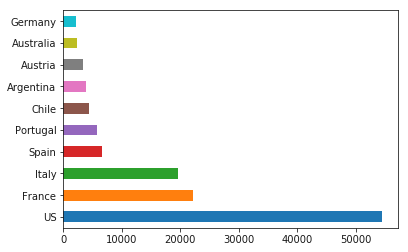

In [52]:
# 调用自定义的函数 对标称数据的频数分布情况进行查看 所有结果以存放在result_dict中
result_dict = object_count(winedata,winedata_object_list)
# 为避免过长的显示不方便查看 以几个为例子查看标称数据
print(result_dict['country'])
# 可视化展示前10个国家 这次试用pandas绘制
# after = dict(sorted(result_dict['country'].items(),key=lambda e:e[1],reverse=True))
# label_list = []
# counts_list = []
# for k in list(after.items())[:10]:
#     label_list.append(k[0])
#     counts_list.append(k[1])
# plt.yticks(np.arange(len(label_list)),label_list)
# plt.barh(np.arange(len(label_list)),counts_list,color=['r','b','y','g'])

country=winedata['country'].value_counts()
country.head(10).plot.barh()

{'Kerin O’Keefe': 10776, 'Roger Voss': 25514, 'Paul Gregutt': 9532, 'Alexander Peartree': 415, 'Michael Schachner': 15134, 'Anna Lee C. Iijima': 4415, 'Virginie Boone': 9537, 'Matt Kettmann': 6332, nan: 26244, 'Sean P. Sullivan': 4966, 'Jim Gordon': 4177, 'Joe Czerwinski': 5147, 'Anne Krebiehl\xa0MW': 3685, 'Lauren Buzzeo': 1835, 'Mike DeSimone': 514, 'Jeff Jenssen': 491, 'Susan Kostrzewa': 1085, 'Carrie Dykes': 139, 'Fiona Adams': 27, 'Christina Pickard': 6}


<Container object of 10 artists>

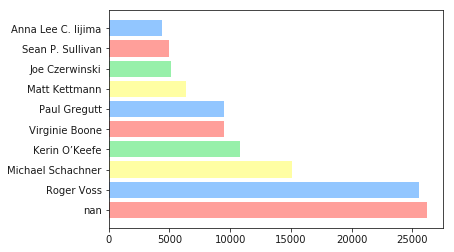

In [53]:
# 类似的展示taster_name  这次用plt并且手动计算
print(result_dict['taster_name'])
after = dict(sorted(result_dict['taster_name'].items(),key=lambda e:e[1],reverse=True))
label_list = []
counts_list = []
for k in list(after.items())[:10]:
    label_list.append(k[0])
    counts_list.append(k[1])
plt.yticks(np.arange(len(label_list)),label_list)
plt.barh(np.arange(len(label_list)),counts_list,color=['r','b','y','g'])

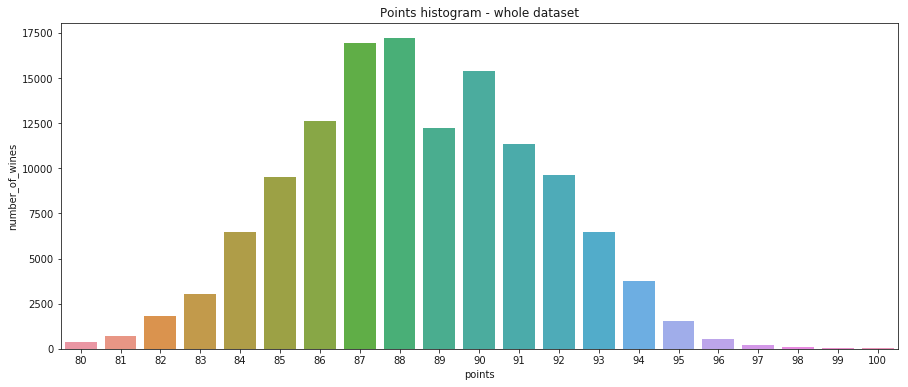

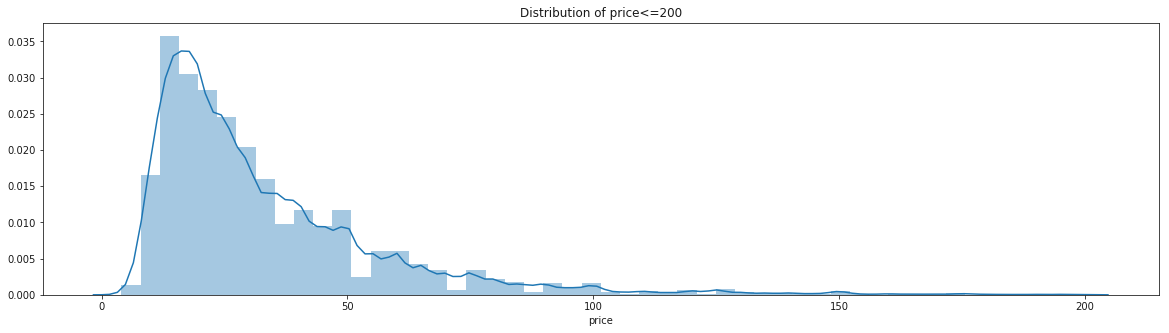

D:\APP\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\APP\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\APP\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


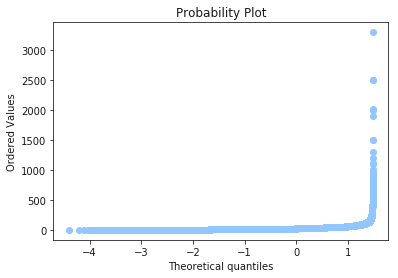

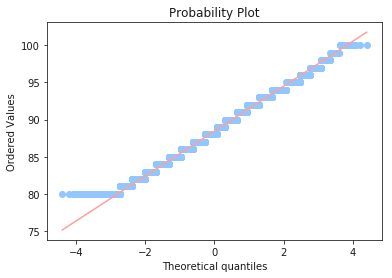

In [54]:
"""绘制数值数据的直方图"""
import seaborn as sns
# 首先绘制的是points的直方图
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()
    
temp = winedata['points'].value_counts()
df = pd.DataFrame({'points':temp.index,
                   'number_of_wines':temp.values
})
pastel_plot(df,'points','number_of_wines')

# 然后对price绘制直方图 特别的这里去price的200以内的价格
plt.figure(figsize=(20,5))
plt.title("Distribution of price<=200")
ax = sns.distplot(winedata[winedata["price"]<200]['price'])
plt.show()

"""绘制qq图"""
stats.probplot(winedata['price'], dist="norm", plot=plt)
plt.show()

stats.probplot(winedata['points'], dist="norm", plot=plt)
plt.show()

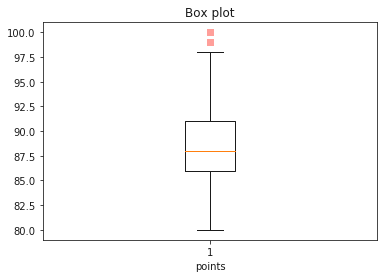

In [55]:

plt.boxplot(winedata['points'],
            notch=False, # box instead of notch shape
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent
 # plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
plt.xlabel('points')
t = plt.title('Box plot')
plt.show()


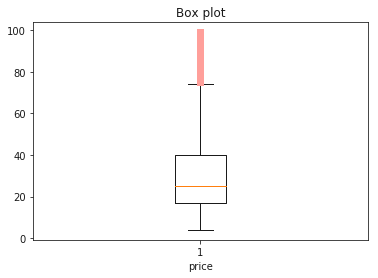

In [56]:
# 由于price的价格分布十分不均匀 因此用100元以内的价格来绘制盒图 便于显示
data = pd.Series(winedata['price'].loc[winedata['price']<100]).dropna()
plt.boxplot(data,
            notch=False, # box instead of notch shape
            sym='rs',    # red squares for outliers
            vert=True)  # vertical box aligmnent
 # plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
plt.xlabel('price')
t = plt.title('Box plot')
plt.show()


## 数据缺失值处理

In [57]:
"""
该部分需要对数据的缺失值进行处理 本部分的主要思路是：
对特征进行单因素相关假设，使用卡方检验来寻找与存在缺失值的属性相关性最强的特征，
利用该特征来估计缺失数据，为了使数据更加真实化，可以用高斯核做处理，使缺失值填补
的更加正态分布。
"""
winedata_file = open("H:\数据挖掘\作业1\wine-reviews\winemag-data-130k-v2.csv",encoding='utf-8')
winedata = pd.read_csv(winedata_file)
"""
方法一：
剔除缺失部分
"""
def fill_delete(dataset):
    d1 = dataset.dropna()
    return d1

"""
方法二：
用最高频率值来填补缺失值
"""
def fill_mode(dataset):
    d2 = pd.DataFrame()
    for obj in dataset.columns[1::]:
        data = winedata[obj]
        filldata = data.mode()[0]
        d2[obj] = winedata[obj].fillna(filldata)
    return d2

In [58]:
"""
方法三：
利用特特征相关性进行空缺值的填补
"""

'\n方法三：\n利用特特征相关性进行空缺值的填补\n'

In [59]:
import math
"""
由于属性多是离散型特征，为了更好发现相关性，先对数值型进行离散化处理
"""
bin = [0,75,80,85,90,95,100]
winedata['points'] = pd.cut(winedata['points'],bin)
winedata['points'] = winedata['points'].astype('str')
# 再处理price
bin = [0,20,30,40,50,60,2100]
winedata['price'] = pd.cut(winedata['price'],bin)
winedata['price'] = winedata['price'].astype('str')

In [60]:
winedata = winedata.drop(columns=['Unnamed: 0','description'])
cols = winedata.columns

In [61]:
points_by_price=winedata[['points','price']]
points_by_price.head()

,points,price
0,"(85, 90]",nan
1,"(85, 90]","(0, 20]"
2,"(85, 90]","(0, 20]"
3,"(85, 90]","(0, 20]"
4,"(85, 90]","(60, 2100]"


In [62]:
points_by_price['points'].value_counts()

(85, 90]     74376
(90, 95]     32754
(80, 85]     21563
(95, 100]      881
(75, 80]       397
Name: points, dtype: int64

In [63]:
points_by_price['price'].value_counts()

(0, 20]       46341
(20, 30]      27114
(30, 40]      16220
(60, 2100]    13235
(40, 50]      11526
nan            8999
(50, 60]       6536
Name: price, dtype: int64

In [64]:
"""
原假设：
H0：假设分数和价格没有统计学上的显著关系
H1：假设分数和价格在统计学上是有显著的关系的
下一步是将数据格式化为频率计数表
列联表通过在pandas中使用pd.crosstab（）函数来实现
"""
contingency_table = pd.crosstab(
    points_by_price['points'],
    points_by_price['price'],
    margins = True
)
contingency_table

price,"(0, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 2100]",nan,All
points,,,,,,,,
"(75, 80]",317,55,17,4,1,1,2,397
"(80, 85]",14387,3617,1345,538,172,280,1224,21563
"(85, 90]",29651,18304,9373,5535,2702,3645,5166,74376
"(90, 95]",1985,5129,5465,5407,3609,8630,2529,32754
"(95, 100]",1,9,20,42,52,679,78,881
All,46341,27114,16220,11526,6536,13235,8999,129971


In [65]:
#Assigns the frequency values
p1 = contingency_table.iloc[0][0:6].values
p2 = contingency_table.iloc[1][0:6].values
p3 = contingency_table.iloc[2][0:6].values
p4 = contingency_table.iloc[3][0:6].values
p5 = contingency_table.iloc[4][0:6].values

f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values,
                  contingency_table.iloc[2][0:6].values,
                  contingency_table.iloc[3][0:6].values,
                  contingency_table.iloc[4][0:6].values])
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(40203.63583423013, 0.0, 20)

In [66]:
winedata_dropped = winedata.drop(columns=['winery','region_1','region_2','variety','title','designation','taster_name','taster_twitter_handle'])

In [67]:
"""在寻求数据相似性的时候，首先将离散化特征进行one-hot编码"""
from numpy import argmax
# 将数据集中的离散特征进行one-hot编码
def onehot_coding(dataset,winedata_object_list):
#     逐特征处理（按列处理）
    for obj in winedata_object_list:
#         objData = np.array(dataset[obj].loc[dataset[obj].notnull()])
        objData = np.array(dataset[obj])
#         生成编码表
        obj_alphabet = list()
        for k in objData:
            if k in obj_alphabet:
                continue
            else:
                obj_alphabet.append(k)
        print(obj,len(obj_alphabet))
        char2int = dict((v,k) for k,v in enumerate(obj_alphabet))
        int2char = dict((k,v) for k,v in enumerate(obj_alphabet))
        inter_encoded = [char2int[char] for char in objData]
        obj_onehot_encoded = list()
        for value in inter_encoded:
            letter = [0]*len(obj_alphabet)
            letter[value] = 1
            obj_onehot_encoded.append(letter)
        dataset[obj] = pd.Series(obj_onehot_encoded)
    

In [101]:

"""
方法四：
根据数据的相似性填补缺失值
使用knn算法缺失值。
"""
import operator
def classify0(inX,dataSet,labels,k):
#     获取数据集规模
    dataSetSize = dataSet.shape[0]
    sequence = []
    for item in range(0,dataSetSize):
        diffMat = 0
        for j in range(0,3):
#     获取测试例子和数据集每个对应的特征值差的平方和 以数组形式返回
            diffMat += ((np.array(inX[j])-np.array(dataSet[item][j]))**2).sum()
#   求均方差
        distances = diffMat**0.5
        sequence.append(distances)
#   均方差升序的索引值排序
    sequence = np.array(sequence)
    sortedDistIndices = sequence.argsort()
#     print(sortedDistIndices)
    classCount = {}
#   统计k个均方差最小的样本分类
    for i in range(k):
        voteIlable = labels[sortedDistIndices[i]]
        classCount[voteIlable] = classCount.get(voteIlable,0) + 1
#   取K中占比例最多的那个分类
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]


In [69]:
winedata_dropped.columns

Index(['country', 'points', 'price', 'province'], dtype='object')

In [70]:
onehot_coding(winedata_dropped,['country', 'points', 'province'])

country 44
points 5
province 426


In [71]:
trainData = winedata_dropped.loc[winedata_dropped['price']!='nan']
trainLabel = np.array(trainData['price'])
trainData = np.array(trainData.drop(columns=['price']))

In [72]:
testData = winedata_dropped.loc[winedata_dropped['price'] == 'nan']
testData = np.array(testData.drop(columns='price'))

In [ ]:
"""
对缺失值进行预测
"""
testLabel = []
for i in range(0,len(testData)):
    predictValue = classify0(np.array(testData[i]),trainData,trainLabel,3)
    testLabel.append(predictValue)
# 对预测情况的分布进行展示
testLabel.hist()

120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972
120972


# okland_crime数据集

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [83]:
# 读取数据集并存放在winedata中 显示一下前几个数据先大概观察一下
record15_file = open("H:/数据挖掘/作业1/oakland-crime-statistics-2011-to-2016/records-for-2016.csv",encoding='utf-8')
recordData = pd.read_csv(record15_file)
dataset = recordData.copy()
dataset.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


In [85]:
"""
数据摘要
对标称属性，给出每个可能取值的频数，
数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。
"""
def object_number_divide(dataset):
    winedata_columns = dataset.columns[::]
    winedata_object_list = []
    winedata_number_list = []
    for obj in winedata_columns:
        if str(dataset[obj].dtypes)== 'object':
            winedata_object_list.append(obj)
        else:
            winedata_number_list.append(obj)
    return winedata_object_list,winedata_number_list

objectList,numberList = object_number_divide(dataset)

In [46]:
"""
标称数据统计
"""
for item in objectList:
    print("*******{0}频数分布情况******".format(item))
    print(dataset[item].value_counts())

*******Agency频数分布情况******
OP    192581
Name: Agency, dtype: int64
*******Create Time频数分布情况******
2015-04-18T13:52:06.000    3
2015-04-27T15:35:28.000    2
2015-11-19T19:34:08.000    2
2015-06-19T17:45:34.000    2
2015-02-09T04:31:45.000    2
2015-08-14T00:19:33.000    2
2015-10-01T11:28:02.000    2
2015-02-21T13:20:16.000    2
2015-07-07T19:20:56.000    2
2015-09-13T00:49:44.000    2
2015-10-28T17:54:30.000    2
2015-07-09T23:35:19.000    2
2015-12-27T06:03:02.000    2
2015-09-03T22:32:25.000    2
2015-02-16T21:19:00.000    2
2015-02-16T11:26:16.000    2
2015-07-27T13:23:10.000    2
2015-09-25T20:28:07.000    2
2015-08-07T14:57:13.000    2
2015-12-13T07:56:54.000    2
2015-11-15T15:49:13.000    2
2015-09-14T09:23:10.000    2
2015-01-14T18:54:05.000    2
2015-09-18T16:48:21.000    2
2015-02-26T11:21:29.000    2
2015-10-25T19:04:28.000    2
2015-08-04T14:23:11.000    2
2015-12-17T22:29:53.000    2
2015-07-18T16:24:28.000    2
2015-07-08T15:59:09.000    2
                          ..
2015

LOP151130000796    1
LOP150327000490    1
LOP150609000481    1
LOP151211001240    1
LOP151206000577    1
LOP150330000777    1
LOP150803000302    1
LOP150311001105    1
LOP150414000490    1
LOP151223000321    1
LOP151110000808    1
LOP150429000708    1
LOP150124000093    1
LOP151227000572    1
LOP150706000478    1
LOP151216000364    1
LOP150811000099    1
LOP150129000487    1
LOP150416000030    1
LOP150128000610    1
LOP150408001004    1
LOP151201000808    1
LOP150422000114    1
LOP150825000650    1
LOP150520000393    1
LOP150421000719    1
LOP150820001046    1
LOP150206000689    1
LOP150814000935    1
LOP151228000702    1
                  ..
LOP150805000313    1
LOP150429000010    1
LOP151031000188    1
LOP150715000017    1
LOP151231000657    1
LOP150808000459    1
LOP150624000782    1
LOP150315000476    1
LOP150914000678    1
LOP150405000402    1
LOP151224000201    1
LOP150610000437    1
LOP150415000193    1
LOP150410000836    1
LOP150728000674    1
LOP150808000317    1
LOP1508230004

In [86]:
"""
数值数据统计
"""
dataset['Priority'].describe()

count    110827.000000
mean          1.778438
std           0.415299
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Priority, dtype: float64

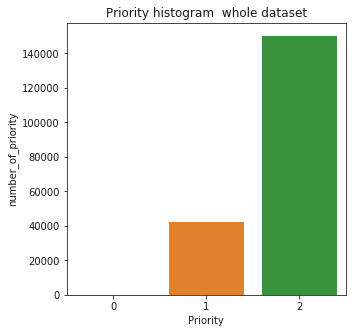

In [66]:
"""绘制数值数据的直方图"""
import seaborn as sns
# 绘制的是Priority的直方图
def pastel_plot(data, x, y):
    plt.figure(figsize = (5,5))
    plt.title('Priority histogram  whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()
    
temp = dataset['Priority'].value_counts()
df = pd.DataFrame({'Priority':temp.index,
                   'number_of_priority':temp.values
})
pastel_plot(df,'Priority','number_of_priority')

D:\APP\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\APP\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\APP\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


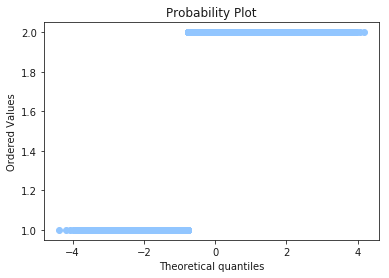

In [87]:
"""绘制qq图"""
stats.probplot(dataset['Priority'], dist="norm", plot=plt)
plt.show()

D:\APP\Anaconda\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\APP\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
D:\APP\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
D:\APP\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
D:\APP\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


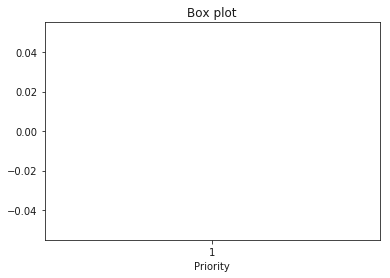

In [89]:
plt.boxplot(dataset['Priority'],
            notch=False, # box instead of notch shape
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent
 # plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
plt.xlabel('Priority')
t = plt.title('Box plot')
plt.show()

In [ ]:
"""该数据比较完整"""